# EDA

## Original Dataset
1. There's no missing values in the dataframe
2. All images in this dataset have uniform size (1050 * 1050)
3. Image names in the dataframe correspond with actual image names
4. Image urls in the dataframe are invalid
5. Annotations CSV file only marked where the sign is located in the images without any label, so we have to label the images by ourselves
6. There are 1538 images in the training dataset in total, but there are 2257 signs in total because one picture sometimes contain more than one signs
7. There's no night time pictures

In [36]:
import pandas as pd

df = pd.read_csv('./SF Parking Sign Detection/trainingset_annotations.csv')
df

,image_name,image_url,xmin,xmax,ymin,ymax
0,Frl1FCa6v4X6z21I0es70w_zoom_5___1_6.jpg,https://requestor-proxy.figure-eight.com/figur...,59,109,300,357
1,Frl1FCa6v4X6z21I0es70w_zoom_5___1_6.jpg,https://requestor-proxy.figure-eight.com/figur...,53,101,257,309
2,FGmto9ZBGMNr_s4_c89G_g_zoom_5___1_11.jpg,https://requestor-proxy.figure-eight.com/figur...,710,826,295,433
3,1Qn5_JRh_Bb8axrWdUej8A_zoom_5___1_9.jpg,https://requestor-proxy.figure-eight.com/figur...,347,389,218,317
4,1Qn5_JRh_Bb8axrWdUej8A_zoom_5___1_9.jpg,https://requestor-proxy.figure-eight.com/figur...,342,381,316,425
...,...,...,...,...,...,...
2252,y1SR9VEd5KAen1iusx2Hdg_zoom_5___1_5.jpg,https://requestor-proxy.figure-eight.com/figur...,538,590,298,354
2253,ZBoz4vPEr1c9Qz25C6CV-g_zoom_5___1_0.jpg,https://requestor-proxy.figure-eight.com/figur...,685,723,306,349
2254,ZBoz4vPEr1c9Qz25C6CV-g_zoom_5___1_12.jpg,https://requestor-proxy.figure-eight.com/figur...,833,874,286,328
2255,zCtKblvtFS0olTVtnOHWbQ_zoom_5___1_7.jpg,https://requestor-proxy.figure-eight.com/figur...,265,299,262,301


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2257 entries, 0 to 2256
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  2257 non-null   object
 1    image_url  2257 non-null   object
 2    xmin       2257 non-null   int64 
 3    xmax       2257 non-null   int64 
 4    ymin       2257 non-null   int64 
 5    ymax       2257 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 105.9+ KB


In [38]:
df.describe()

,xmin,xmax,ymin,ymax
count,2257.000000,2257.000000,2257.000000,2257.000000
mean,516.705361,572.592379,309.746566,384.462561
std,302.748791,303.288366,170.445509,173.910269
min,0.000000,29.000000,0.000000,13.000000
25%,245.000000,303.000000,233.000000,301.000000
50%,524.000000,583.000000,287.000000,350.000000
75%,786.000000,844.000000,339.000000,415.000000
max,1037.000000,1050.000000,1022.000000,1050.000000


In [6]:
from pathlib import Path

PATH = Path("./SF Parking Sign Detection/trainingset/trainingset")
list(PATH.iterdir())[:5]

[PosixPath('SF Parking Sign Detection/trainingset/trainingset/j405wJThv5K_xS8DfusUow_zoom_5___1_6.jpg'),
 PosixPath('SF Parking Sign Detection/trainingset/trainingset/Frl1FCa6v4X6z21I0es70w_zoom_5___1_6.jpg'),
 PosixPath('SF Parking Sign Detection/trainingset/trainingset/57RyEsvd32kH-qe4mk8d8Q_zoom_5___2_1.jpg'),
 PosixPath('SF Parking Sign Detection/trainingset/trainingset/FGmto9ZBGMNr_s4_c89G_g_zoom_5___1_11.jpg'),
 PosixPath('SF Parking Sign Detection/trainingset/trainingset/hjFahFKnmHpdqzToLzjmsQ_zoom_5___1_12.jpg')]

In [7]:
import cv2
import matplotlib.pyplot as plt 

def read_image(path):
    img = cv2.imread(str(path))
    if img is None:
        return None
    else:
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

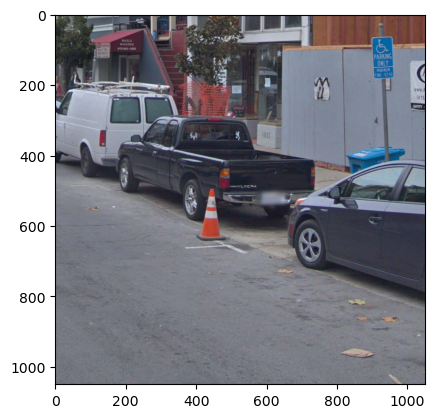

In [8]:
path = PATH/'57RyEsvd32kH-qe4mk8d8Q_zoom_5___2_1.jpg'
img = read_image(path)
plt.imshow(img)

In [42]:
img = cv2.imread(str(path))
img.shape

(1050, 1050, 3)

In [43]:
import numpy as np

files = list(PATH.iterdir())
imgs = [read_image(str(p)).shape for p in files if read_image(str(p)) is not None]
np.unique(imgs)

array([   3, 1050])

In [44]:
print(f'Number of pictures: {len(files)}')

Number of pictures: 1538


All images are of the same size

## Dataset with Labels
1.  There are five kinds of parking signs in the dataset: No Parking, 1 Hour Parking, 2 Hour Parking, No Parking Anytime, and Disabled Parking
2.  The number of No Parking signs are more than other types of signs combined

In [45]:
import os

classes_path = './dataset/classes.txt'

with open(classes_path, 'r') as file:
    classes = [line.strip() for line in file.readlines()]

labels_path = './dataset/labels'
label_data = {}

for label_file in os.listdir(labels_path):
    image_name = label_file.replace('.txt', '')
    with open(os.path.join(labels_path, label_file), 'r') as file:
        boxes = [line.strip().split() for line in file.readlines()]
        label_data[image_name] = [{
            'class_index': int(box[0]),
            'x_center': float(box[1]),
            'y_center': float(box[2]),
            'width': float(box[3]),
            'height': float(box[4]),
            'class_label': classes[int(box[0])]
        } for box in boxes]


In [46]:
from PIL import Image
import matplotlib.pyplot as plt

images_path = './dataset/images'

def show_image_with_boxes(image_name):
    image_path = os.path.join(images_path, f'{image_name}.jpg')  # Adjust the extension as necessary
    image = Image.open(image_path)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    
    for box in label_data[image_name]:
        left = (box['x_center'] - box['width'] / 2) * image.width
        top = (box['y_center'] - box['height'] / 2) * image.height
        width = box['width'] * image.width
        height = box['height'] * image.height
        
        rect = plt.Rectangle((left, top), width, height, linewidth=1, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
        
        label = box['class_label']
        
        plt.gca().text(left, top, label, bbox=dict(facecolor='yellow', alpha=0.5), clip_on=True, fontsize=8)
    
    plt.axis('off')
    plt.show()


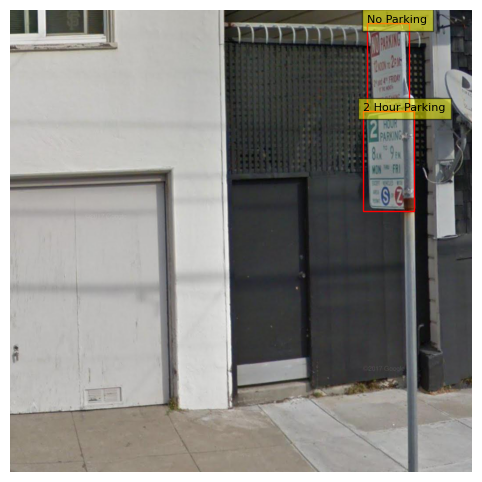

In [47]:
show_image_with_boxes('fFIe4rNoNM5_VGcGG5Z_lg_zoom_5___1_10')

# Data Preparation for Model Training 

## Splitting the entire dataset into train, validation, test

As we can see from below, train, validation and test datasets have proportionate distribution of different kinds of parking signs

In [18]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Directories for images and labels
image_dir = './dataset/images'
label_dir = './dataset/labels'

# Get list of file names without extension
files = [f.split('.')[0] for f in os.listdir(image_dir) if f.endswith('.jpg')]

# Split files into training, validation, and test sets
train_val_files, test_files = train_test_split(files, test_size=0.1, random_state=42)
train_files, val_files = train_test_split(train_val_files, test_size=0.2, random_state=42)

def copy_files(files, source_dir, target_dir, file_type):
    for f in files:
        src_path = os.path.join(source_dir, f + file_type)
        tgt_path = os.path.join(target_dir, f + file_type)
        if not os.path.exists(tgt_path):
            shutil.copy(src_path, tgt_path)  # Changed from os.symlink to shutil.copy

# Create directories if they don't exist
os.makedirs('data/images/train', exist_ok=True)
os.makedirs('data/images/val', exist_ok=True)
os.makedirs('data/images/test', exist_ok=True)
os.makedirs('data/labels/train', exist_ok=True)
os.makedirs('data/labels/val', exist_ok=True)
os.makedirs('data/labels/test', exist_ok=True)

# Copy files to their respective directories
copy_files(train_files, image_dir, 'data/images/train', '.jpg')
copy_files(val_files, image_dir, 'data/images/val', '.jpg')
copy_files(test_files, image_dir, 'data/images/test', '.jpg')
copy_files(train_files, label_dir, 'data/labels/train', '.txt')
copy_files(val_files, label_dir, 'data/labels/val', '.txt')
copy_files(test_files, label_dir, 'data/labels/test', '.txt')


In [4]:
import json
import matplotlib.pyplot as plt
import pandas as pd

def show_counts(data):

    df = pd.DataFrame(list(sign_count_dict.items()), columns=['Type', 'Count'])
    
    plt.figure(figsize=(10, 6))
    plt.bar(df['Type'], df['Count'], color='#FFAA80')
    plt.xlabel('Parking Sign Type')
    plt.ylabel('Count')
    plt.title('Counts of Different Parking Signs')
    plt.xticks(rotation=45)
    plt.show()

labels_file = './SF Parking Sign Detection/annotations.json' 

with open(labels_file) as f:
    data = json.load(f)

def get_sign_counts(data):
    sign_count_dict = {'No Parking': 0, '1 Hour Parking': 0, '2 Hour Parking': 0, 'No Parking Anytime': 0, 'Disabled Parking Only': 0, 'Stop': 0}
    for image_data in data:
        annotation = image_data['annotations'][0]
        for r in annotation['result']:
            value = r['value']
            if 'rectanglelabels' in value:
                parking_sign_type = value['rectanglelabels'][0] if len(value['rectanglelabels']) > 0 else None
                if parking_sign_type != None:
                    sign_count_dict[parking_sign_type] += 1
    return sign_count_dict

sign_count_dict = get_sign_counts(data)
print(sign_count_dict)

{'No Parking': 1362, '1 Hour Parking': 84, '2 Hour Parking': 459, 'No Parking Anytime': 168, 'Disabled Parking Only': 8, 'Stop': 0}


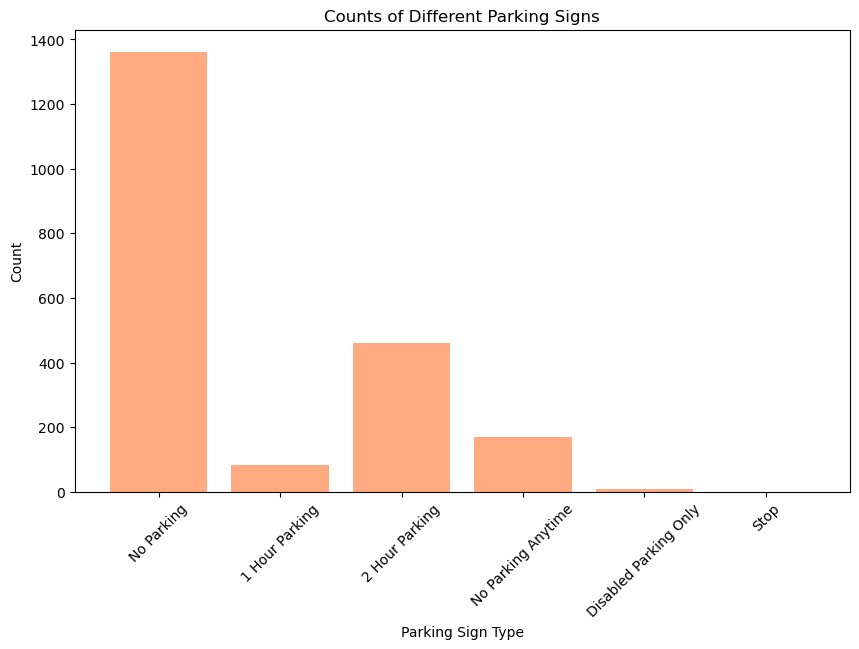

In [5]:
show_counts(list(sign_count_dict.items()))

['No Parking', '1 Hour Parking', '2 Hour Parking', 'No Parking Anytime', 'Disabled Parking Only']
[1222, 75, 413, 153, 7]


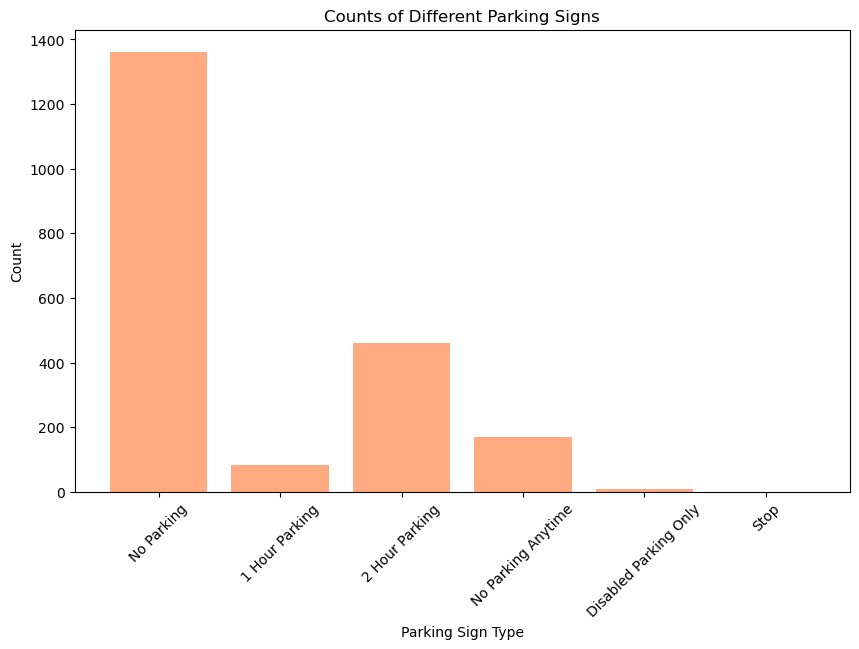

In [13]:
import os
import matplotlib.pyplot as plt
import pandas as pd

def get_sign_counts_dict(label_folder):
    sign_count_dict = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
    
    for filename in os.listdir(label_folder):
        if filename.endswith(".txt"):
            filepath = os.path.join(label_folder, filename)
            with open(filepath, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    class_id = int(line.split()[0])
                    if class_id in sign_count_dict:
                        sign_count_dict[class_id] += 1
    
    class_mapping = {
        3: 'No Parking',
        0: '1 Hour Parking',
        1: '2 Hour Parking',
        4: 'No Parking Anytime',
        2: 'Disabled Parking Only'
    }
    
    labels = ['No Parking', '1 Hour Parking', '2 Hour Parking', 'No Parking Anytime', 'Disabled Parking Only']
    counts = [sign_count_dict[key] for key in class_mapping.keys() if class_mapping[key] in labels]
    print(labels)
    print(counts)

    return zip(labels, counts)

sign_counts_train_val = get_sign_counts_dict('./90_subset/labels')
show_counts(list(sign_counts_train_val))

['No Parking', '1 Hour Parking', '2 Hour Parking', 'No Parking Anytime', 'Disabled Parking Only']
[140, 9, 46, 15, 1]


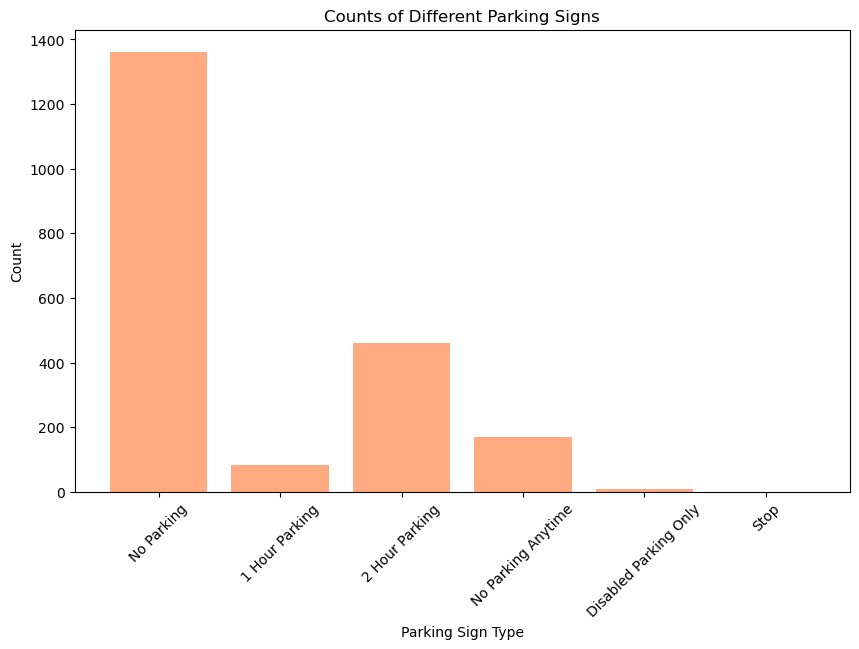

In [14]:
sign_counts_test = get_sign_counts_dict('./data/labels/test')
show_counts(list(sign_counts_test))

## Data Processing for No Parking sign

### Get images contain No Parking sign

In [19]:
import os
from pathlib import Path
import random
import shutil

# Define the path to the directories containing the images and annotations
dataset_dir = Path('./90_subset')
dataset_images_dir = dataset_dir / 'images'
dataset_annotations_dir = dataset_dir / 'labels'
subsetroot_dir = Path('./noparking_subsets')
images_dir = subsetroot_dir / 'images'
annotations_dir = subsetroot_dir / 'labels'

subsetroot_dir.mkdir(exist_ok=True)

# Function to check if the annotation contains a specific label ID
def contains_label_id(annotation_path, label_id):
    with open(annotation_path, 'r') as file:
        for line in file:
            if int(line.split()[0]) == label_id:
                return True
    return False

# Gather all image files and ensure corresponding annotation does not contain label ID 3
image_files = []
for img in dataset_images_dir.glob('*.jpg'):
    dataset_annotation_file = dataset_annotations_dir / (img.stem + '.txt')
    if dataset_annotation_file.exists() and contains_label_id(dataset_annotation_file, 3):
        image_files.append(img)

print(len(image_files))


1152


### Split Images Contain No Parking sign into different sizes of subsets

In [24]:
# Define subset sizes
subset_sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, len(image_files)]

# Starting index for slicing the list
start = 0

# Create subfolders and copy the corresponding files
for size in subset_sizes:
    random.shuffle(image_files)
    if start + size > len(image_files):  # Ensure there are enough images left
        start = len(image_files) - size
    # Define the output directory for this subset
    subset_dir = subsetroot_dir / f'subset_{size}'
    subset_dir.mkdir(exist_ok=True)
    subset_images_dir = subset_dir / 'images'
    subset_images_dir.mkdir(exist_ok=True)
    subset_annotations_dir = subset_dir / 'labels'
    subset_annotations_dir.mkdir(exist_ok=True)
    
    # Select the subset of images
    selected_images = image_files[start:start + size]
    
    # Copy each image and its annotation
    for img_path in selected_images:
        # Copy image
        shutil.copy(img_path, subset_images_dir / img_path.name)
        annotation_path = dataset_annotations_dir / (img_path.stem + '.txt')
        shutil.copy(annotation_path, subset_annotations_dir / annotation_path.name)

    start += size

print("Random subsets have been created and populated with images and annotations.")

Random subsets have been created and populated with images and annotations.


### Filter out other labels on these images

In [26]:
from pathlib import Path

def filter_annotations(directory, target_label_id):
    for annotation_file in directory.glob('*.txt'):
        with open(annotation_file, 'r') as file:
            lines = file.readlines()

        filtered_lines = [line for line in lines if int(line.split()[0]) == target_label_id]
        
        with open(annotation_file, 'w') as file:
            file.writelines(filtered_lines)

        if not filtered_lines: 
            os.remove(annotation_file)
            print(f"Removed empty file: {annotation_file}")

root_directory = Path('./noparking_subsets')

for subset_size in subset_sizes:
    directory = root_directory / f'subset_{subset_size}'
    for path in directory.iterdir():
        labels_path = path / 'labels'
        filter_annotations(path, 3)

### Split data in each subset into train and validation set

In [27]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

base_dir = Path('./noparking_subsets')

subset_sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, len(image_files)]

for subset_size in subset_sizes:
    image_dir = base_dir / f'subset_{subset_size}' / 'images'
    label_dir = base_dir / f'subset_{subset_size}' / 'labels'
    files = [f.split('.')[0] for f in os.listdir(image_dir) if f.endswith('.jpg')]
    train_files, val_files = train_test_split(files, test_size=0.2, random_state=42)
    
    def copy_files(files, source_dir, target_dir, file_type):
        for f in files:
            src_path = os.path.join(source_dir, f + file_type)
            tgt_path = os.path.join(target_dir, f + file_type)
            if not os.path.exists(tgt_path):
                shutil.copy(src_path, tgt_path)

    
    os.makedirs(base_dir / f'data_{subset_size}/images/train', exist_ok=True)
    os.makedirs(base_dir / f'data_{subset_size}/images/val', exist_ok=True)
    os.makedirs(base_dir / f'data_{subset_size}/labels/train', exist_ok=True)
    os.makedirs(base_dir / f'data_{subset_size}/labels/val', exist_ok=True)
    
    copy_files(train_files, image_dir, base_dir / f'data_{subset_size}/images/train', '.jpg')
    copy_files(val_files, image_dir, base_dir / f'data_{subset_size}/images/val', '.jpg')
    copy_files(train_files, label_dir, base_dir / f'data_{subset_size}/labels/train', '.txt')
    copy_files(val_files, label_dir, base_dir / f'data_{subset_size}/labels/val', '.txt')


# Model Training

After we splited our data, we need to do training on 12 datasets:
1. Original dataset (the entire dataset)
2. 100 no parking sign dataset
3. 200 no parking sign dataset
4. 300 no parking sign dataset
5. 400 no parking sign dataset
6. 500 no parking sign dataset
7. 600 no parking sign dataset
8. 700 no parking sign dataset
9. 800 no parking sign dataset
10. 900 no parking sign dataset
11. 1000 no parking sign dataset
12. 1152 no parking sign dataset

The following cell is only for demonstration purposes because did the training in Google Colab using A100 GPU, but we set the same hyperparameters for all the models, here's a list of hyperparameters we used:
* Number of epoches (100 for original dataset, 50 for no parking sign datasets)
* Optimizer: Adam, lr=0.001, momentum=0.9
* Batch size: 16
* Image size: 640

Training is done via Google Colab, for more info about model training, please refer to `model_training.ipynb` file

In [ ]:
from ultralytics import YOLO

model = YOLO(model='yolov8n.pt')

model.train(
    data='./data/my_dataset.yaml', 
    epochs=200, 
    batch=16, 
    imgsz=640 
)

# Results

## Original Model

In [31]:
from ultralytics import YOLO

model = YOLO('./final_runs_2/train/weights/best.pt')

In [33]:
model_results = model.val(data='./data/my_dataset.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,)

Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAll

val: New cache created: /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAllowed/data/labels/val.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        277        383      0.802       0.86      0.872      0.711
        1 Hour Parking        277         12      0.643       0.75      0.735      0.615
        2 Hour Parking        277         90      0.875      0.933      0.931      0.745
            No Parking        277        251      0.797      0.924      0.929      0.738
    No Parking Anytime        277         30      0.893      0.833      0.895      0.747
Speed: 0.7ms preprocess, 149.0ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val5


In [35]:
pixel_test_model_results = model.val(data='./pixel_test/my_dataset.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,)

Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAll

val: New cache created: /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAllowed/pixel_test/labels/val.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        122        134      0.814      0.851      0.874      0.723
            No Parking        122        134      0.814      0.851      0.874      0.723
Speed: 0.8ms preprocess, 144.0ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val7


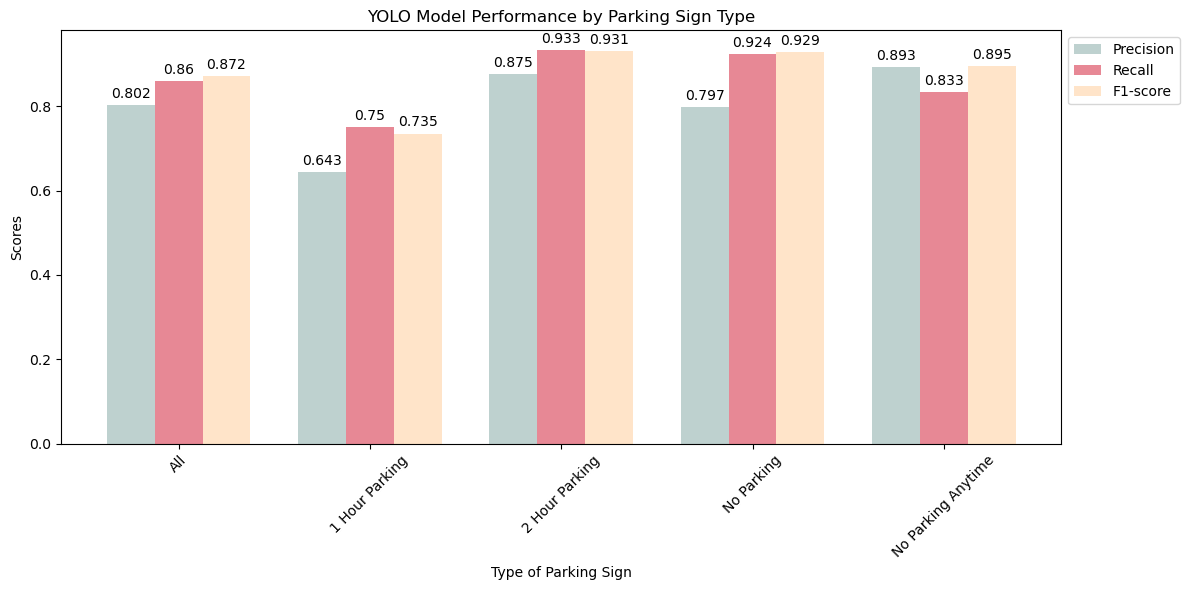

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data from your YOLO model's output
data = {
    "Type": ["All", "1 Hour Parking", "2 Hour Parking", "No Parking", "No Parking Anytime"],
    "Precision": [0.802, 0.643, 0.875, 0.797, 0.893],
    "Recall": [0.86, 0.75, 0.933, 0.924, 0.833],
    "F1-score": [0.872, 0.735, 0.931, 0.929, 0.895]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(df['Type']))  # Positions for the groups
width = 0.25  # Bar width

# Define colors for each group
colors = ['#BED1CF', '#E78895', '#FFE4C9']

# Create bars with specific colors
rects1 = ax.bar(x - width, df['Precision'], width, label='Precision', color=colors[0])
rects2 = ax.bar(x, df['Recall'], width, label='Recall', color=colors[1])
rects3 = ax.bar(x + width, df['F1-score'], width, label='F1-score', color=colors[2])

# Add text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Type of Parking Sign')
ax.set_ylabel('Scores')
ax.set_title('YOLO Model Performance by Parking Sign Type')
ax.set_xticks(x)
ax.set_xticklabels(df['Type'], rotation=45)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Moving legend outside the plot

# Function to add labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function for each set of bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()


## No Parking Sign Subsets

In [36]:
from ultralytics import YOLO

model_100 = YOLO('./final_runs_2/train2/weights/best.pt')
model_200 = YOLO('./final_runs_2/train3/weights/best.pt')
model_300 = YOLO('./final_runs_2/train4/weights/best.pt')
model_400 = YOLO('./final_runs_2/train5/weights/best.pt')
model_500 = YOLO('./final_runs_2/train6/weights/best.pt')
model_600 = YOLO('./final_runs_2/train7/weights/best.pt')
model_700 = YOLO('./final_runs_2/train8/weights/best.pt')
model_800 = YOLO('./final_runs_2/train9/weights/best.pt')
model_900 = YOLO('./final_runs_2/train10/weights/best.pt')
model_1000 = YOLO('./final_runs_2/train11/weights/best.pt')
model_1152 = YOLO('./final_runs_2/train12/weights/best.pt')

In [37]:
orig_test_100_results = model_100.val(data='./orig_test/my_dataset.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,)

Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAll

val: New cache created: /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAllowed/orig_test/labels/val.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        132        140      0.862      0.757      0.826      0.649
            No Parking        132        140      0.862      0.757      0.826      0.649
Speed: 0.8ms preprocess, 145.4ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val8


In [38]:
orig_test_200_results = model_200.val(data='./orig_test/my_dataset.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,)

Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAll
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        132        140      0.829      0.936      0.925      0.695
            No Parking        132        140      0.829      0.936      0.925      0.695
Speed: 0.7ms preprocess, 145.5ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val9


In [39]:
orig_test_300_results = model_300.val(data='./orig_test/my_dataset.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,)

Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAll
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        132        140      0.879      0.943      0.942      0.732
            No Parking        132        140      0.879      0.943      0.942      0.732
Speed: 0.7ms preprocess, 145.0ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val10


In [40]:
orig_test_400_results = model_400.val(data='./orig_test/my_dataset.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,)

Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAll
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        132        140      0.908      0.943       0.95      0.758
            No Parking        132        140      0.908      0.943       0.95      0.758
Speed: 0.6ms preprocess, 145.4ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val11


In [41]:
orig_test_500_results = model_500.val(data='./orig_test/my_dataset.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,)

Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAll
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        132        140      0.855      0.971      0.966      0.772
            No Parking        132        140      0.855      0.971      0.966      0.772
Speed: 0.6ms preprocess, 145.0ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val12


In [42]:
orig_test_600_results = model_600.val(data='./orig_test/my_dataset.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,)

Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAll
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        132        140      0.917      0.944      0.945       0.75
            No Parking        132        140      0.917      0.944      0.945       0.75
Speed: 0.6ms preprocess, 144.7ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val13


In [43]:
orig_test_700_results = model_700.val(data='./orig_test/my_dataset.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,)

Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAll
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        132        140      0.939      0.876      0.963      0.734
            No Parking        132        140      0.939      0.876      0.963      0.734
Speed: 0.6ms preprocess, 146.9ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val14


In [44]:
orig_test_800_results = model_800.val(data='./orig_test/my_dataset.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,)

Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAll
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        132        140      0.942       0.95      0.973      0.771
            No Parking        132        140      0.942       0.95      0.973      0.771
Speed: 0.6ms preprocess, 144.8ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val15


In [46]:
orig_test_900_results = model_900.val(data='./orig_test/my_dataset.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,)

Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAll
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        132        140      0.911      0.946      0.963      0.771
            No Parking        132        140      0.911      0.946      0.963      0.771
Speed: 0.6ms preprocess, 146.3ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val17


In [45]:
orig_test_1000_results = model_1000.val(data='./orig_test/my_dataset.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,)

Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAll
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        132        140      0.933       0.95      0.963      0.761
            No Parking        132        140      0.933       0.95      0.963      0.761
Speed: 0.6ms preprocess, 145.0ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val16


In [47]:
orig_test_1152_results = model_1152.val(data='./orig_test/my_dataset.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,)

Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAll
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        132        140      0.905      0.943      0.963      0.767
            No Parking        132        140      0.905      0.943      0.963      0.767
Speed: 0.8ms preprocess, 146.1ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val18


## Pixel Images

In [48]:
pixel_test_100_results = model_100.val(data='./pixel_test/my_dataset.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,)

Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAll
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        122        134      0.919      0.761      0.861       0.73
            No Parking        122        134      0.919      0.761      0.861       0.73
Speed: 0.6ms preprocess, 143.5ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val19


In [49]:
pixel_test_200_results = model_200.val(data='./pixel_test/my_dataset.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,)

Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAll
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        122        134      0.862      0.794      0.859      0.671
            No Parking        122        134      0.862      0.794      0.859      0.671
Speed: 0.6ms preprocess, 142.9ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val20


In [50]:
pixel_test_300_results = model_300.val(data='./pixel_test/my_dataset.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,)

Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAll
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        122        134      0.852      0.851      0.889      0.698
            No Parking        122        134      0.852      0.851      0.889      0.698
Speed: 0.6ms preprocess, 143.1ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val21


In [51]:
pixel_test_400_results = model_400.val(data='./pixel_test/my_dataset.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,)

Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAll
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        122        134      0.836      0.761      0.835      0.716
            No Parking        122        134      0.836      0.761      0.835      0.716
Speed: 0.7ms preprocess, 142.6ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val22


In [52]:
pixel_test_500_results = model_500.val(data='./pixel_test/my_dataset.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,)

Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAll
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        122        134      0.841      0.871      0.904      0.745
            No Parking        122        134      0.841      0.871      0.904      0.745
Speed: 0.6ms preprocess, 141.6ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val23


In [53]:
pixel_test_600_results = model_600.val(data='./pixel_test/my_dataset.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,)

Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAll
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        122        134      0.829      0.866      0.889      0.723
            No Parking        122        134      0.829      0.866      0.889      0.723
Speed: 0.6ms preprocess, 142.4ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val24


In [54]:
pixel_test_700_results = model_700.val(data='./pixel_test/my_dataset.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,)

Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAll
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        122        134      0.779      0.843      0.853       0.68
            No Parking        122        134      0.779      0.843      0.853       0.68
Speed: 0.7ms preprocess, 142.2ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val25


In [55]:
pixel_test_800_results = model_800.val(data='./pixel_test/my_dataset.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,)

Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAll
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        122        134      0.865      0.851      0.904      0.757
            No Parking        122        134      0.865      0.851      0.904      0.757
Speed: 0.7ms preprocess, 146.6ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val26


In [56]:
pixel_test_900_results = model_900.val(data='./pixel_test/my_dataset.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,)

Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAll
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        122        134      0.899      0.865      0.914      0.766
            No Parking        122        134      0.899      0.865      0.914      0.766
Speed: 0.6ms preprocess, 142.8ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val27


In [57]:
pixel_test_1000_results = model_1000.val(data='./pixel_test/my_dataset.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,)

Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAll
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        122        134      0.917      0.799      0.908      0.749
            No Parking        122        134      0.917      0.799      0.908      0.749
Speed: 0.6ms preprocess, 139.8ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val28


In [58]:
pixel_test_1152_results = model_1152.val(data='./pixel_test/my_dataset.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,)

Ultralytics YOLOv8.2.5 🚀 Python-3.12.1 torch-2.2.0 CPU (Apple M2)


val: Scanning /Users/mingdama/Documents/02-Study/03-Classes/CS663/Parking-Sign-Detection/NoParkingAll
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        122        134      0.851      0.851      0.895      0.745
            No Parking        122        134      0.851      0.851      0.895      0.745
Speed: 0.6ms preprocess, 139.4ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val29


In [59]:
print(pixel_test_1152_results.results_dict)

{'metrics/precision(B)': 0.8507462686567164, 'metrics/recall(B)': 0.8507462686567164, 'metrics/mAP50(B)': 0.8945703032419685, 'metrics/mAP50-95(B)': 0.7448638847908737, 'fitness': 0.7598345266359832}


In [60]:
pixel_mapping = {
    '100': pixel_test_100_results.results_dict,
    '200': pixel_test_200_results.results_dict,
    '300': pixel_test_300_results.results_dict,
    '400': pixel_test_400_results.results_dict,
    '500': pixel_test_500_results.results_dict,
    '600': pixel_test_600_results.results_dict,
    '700': pixel_test_700_results.results_dict,
    '800': pixel_test_800_results.results_dict,
    '900': pixel_test_900_results.results_dict,
    '1000': pixel_test_1000_results.results_dict,
    '1152': pixel_test_1152_results.results_dict,
}
    
orig_mapping = {
    '100': orig_test_100_results.results_dict,
    '200': orig_test_200_results.results_dict,
    '300': orig_test_300_results.results_dict,
    '400': orig_test_400_results.results_dict,
    '500': orig_test_500_results.results_dict,
    '600': orig_test_600_results.results_dict,
    '700': orig_test_700_results.results_dict,
    '800': orig_test_800_results.results_dict,
    '900': orig_test_900_results.results_dict,
    '1000': orig_test_1000_results.results_dict,
    '1152': orig_test_1152_results.results_dict,
}

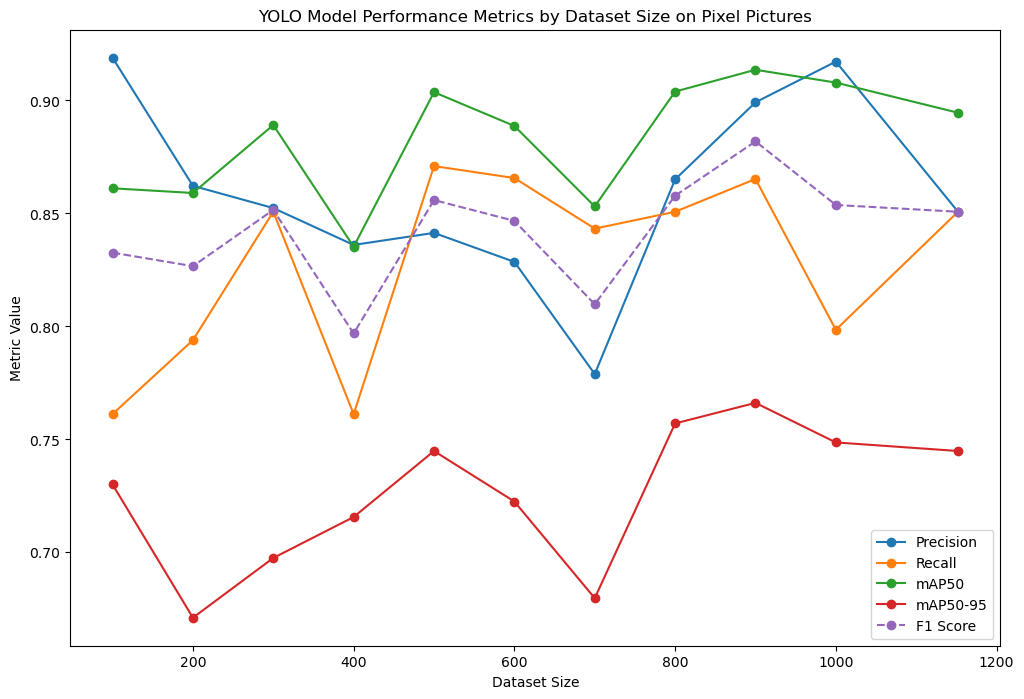

In [74]:
import matplotlib.pyplot as plt

# Define the dataset sizes
dataset_sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1152]

# Initialize lists to hold the metrics
precisions = []
recalls = []
map50s = []
map50_95s = []
f1_scores = []  # List for F1 scores

# Extract metrics from each results_dict
for size in dataset_sizes:
    results_dict = pixel_mapping[str(size)]
    precision = results_dict['metrics/precision(B)']
    recall = results_dict['metrics/recall(B)']
    precisions.append(precision)
    recalls.append(recall)
    map50s.append(results_dict['metrics/mAP50(B)'])
    map50_95s.append(results_dict['metrics/mAP50-95(B)'])
    
    # Calculate F1 score
    if (precision + recall) != 0:
        f1_score = 2 * (precision * recall) / (precision + recall)
    else:
        f1_score = 0
    f1_scores.append(f1_score)

# Plotting
plt.style.use('default') 
plt.figure(figsize=(12, 8))
plt.plot(dataset_sizes, precisions, label='Precision', marker='o')
plt.plot(dataset_sizes, recalls, label='Recall', marker='o')
plt.plot(dataset_sizes, map50s, label='mAP50', marker='o')
plt.plot(dataset_sizes, map50_95s, label='mAP50-95', marker='o')
plt.plot(dataset_sizes, f1_scores, label='F1 Score', marker='o', linestyle='--')  # Plot F1 scores
plt.title('YOLO Model Performance Metrics by Dataset Size on Pixel Pictures')
plt.xlabel('Dataset Size')
plt.ylabel('Metric Value')
plt.legend()
plt.show()


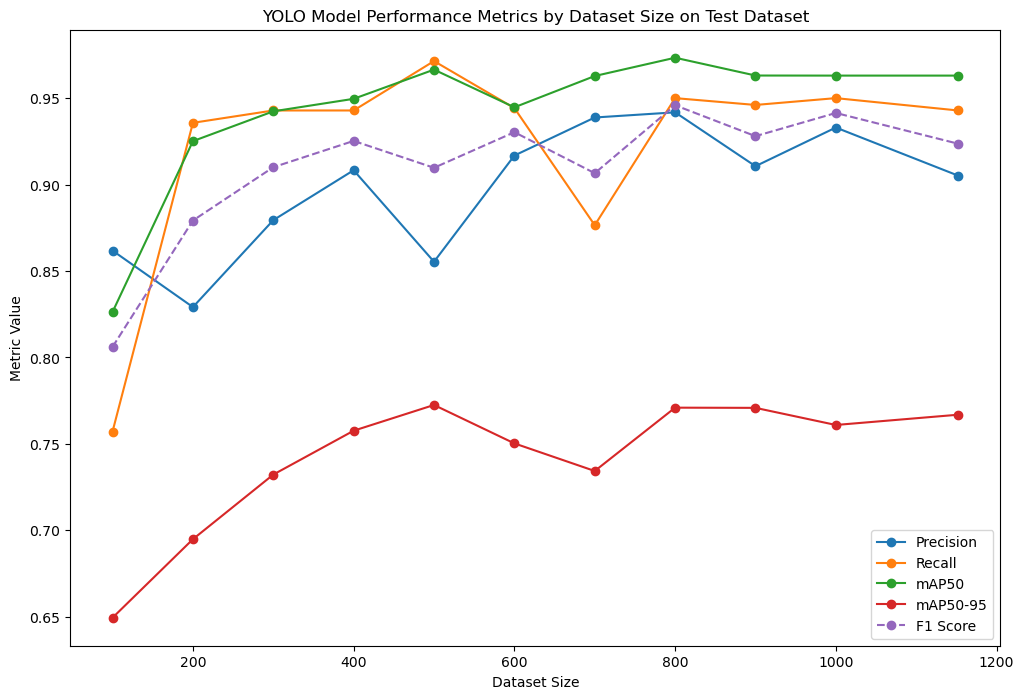

In [67]:
import matplotlib.pyplot as plt

# Define the dataset sizes
dataset_sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1152]

# Initialize lists to hold the metrics
precisions = []
recalls = []
map50s = []
map50_95s = []
f1_scores = []  # List for F1 scores

# Extract metrics from each results_dict
for size in dataset_sizes:
    results_dict = orig_mapping[str(size)]
    precision = results_dict['metrics/precision(B)']
    recall = results_dict['metrics/recall(B)']
    precisions.append(precision)
    recalls.append(recall)
    map50s.append(results_dict['metrics/mAP50(B)'])
    map50_95s.append(results_dict['metrics/mAP50-95(B)'])
    
    # Calculate F1 score
    if (precision + recall) != 0:
        f1_score = 2 * (precision * recall) / (precision + recall)
    else:
        f1_score = 0
    f1_scores.append(f1_score)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(dataset_sizes, precisions, label='Precision', marker='o')
plt.plot(dataset_sizes, recalls, label='Recall', marker='o')
plt.plot(dataset_sizes, map50s, label='mAP50', marker='o')
plt.plot(dataset_sizes, map50_95s, label='mAP50-95', marker='o')
plt.plot(dataset_sizes, f1_scores, label='F1 Score', marker='o', linestyle='--')  # Plot F1 scores
plt.title('YOLO Model Performance Metrics by Dataset Size on Test Dataset')
plt.xlabel('Dataset Size')
plt.ylabel('Metric Value')
plt.legend()
plt.show()
